In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import networkx as nx
import matplotlib
from matplotlib.pyplot import show
import matplotlib.ticker as ticker

In [2]:
# load in the dataset into a pandas dataframe, see the shape
df_1 = pd.read_csv('C:\\Users\\raz37388\\Desktop\\Fluor Dataset\\A5ME_MTO_.csv',encoding='windows-1252')
df_1.shape

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(70278, 57)

In [3]:
#make a copy of the dataset 
df = df_1.copy()

In [4]:
#show first three rows of the copied dataset
df.head(3)

,ASSEMBLY_TYPE,PROJECT_NUMBER,PROJECT_NAME,OFFICE,BOM_DRAWING_NUMBER,BOM_SHEET_NUMBER,BOM_REV_NUMBER,BOM_NUMBER,PRIME_ID,STAGE,...,SIZE_SOURCE_CODE,SCHEDULE_WALL2,MATL_CODE_ID,EQUIVALENT_LENGTH,EST_CATEGORY,EST_MATL_GRADE,EST_ENDS,UEH_END,UEH_SCHEDULE_THICKNESS,IMPERIAL_SIZE_1
0,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311010,1,4.0,MMX-2311010-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
1,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311013,1,2.0,MMR-2311013-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2
2,NON-ASSEMBLY,A5ME,SAP,AMSTERDAM,2311036,1,2.0,MMX-2311036-01,5,F,...,555000.0,S-STD,8002361.0,1.0,Pipe,316/316L Stainless Steels,Bolted,BOLTED,S-10,2


In [5]:
#summary of the copied dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70278 entries, 0 to 70277
Data columns (total 57 columns):
ASSEMBLY_TYPE             70278 non-null object
PROJECT_NUMBER            70278 non-null object
PROJECT_NAME              70278 non-null object
OFFICE                    70278 non-null object
BOM_DRAWING_NUMBER        70278 non-null object
BOM_SHEET_NUMBER          63734 non-null object
BOM_REV_NUMBER            48169 non-null float64
BOM_NUMBER                70278 non-null object
PRIME_ID                  70278 non-null int64
STAGE                     70278 non-null object
PID                       20 non-null object
WBS                       70278 non-null object
WBS_DESCRIPTION           70278 non-null object
AREA                      70278 non-null int64
UNIT                      70278 non-null int64
LINE_CLASS                54138 non-null object
DESTINATION_ID            70278 non-null object
BOM_ID                    70278 non-null int64
MATL_ID                   70278 n

In [6]:
# new datase with the column needed for the analysis
df_fluor = df.loc[:, ['BOM_NUMBER','WBS','AREA','FAB_CLASS', 'SIZE_1','SIZE_2','SIZE_3', 'UOM_SIZE_1', 'UOM_SIZE_2','UOM_SIZE_3','WEIGHT', 'WEIGHT_UOM','MATL_CODE_PRNT','EST_CATEGORY', 'QTY_REQUIRED']]            
   

In [7]:
#first three rows of the dataset
df_fluor.head(3)

,BOM_NUMBER,WBS,AREA,FAB_CLASS,SIZE_1,SIZE_2,SIZE_3,UOM_SIZE_1,UOM_SIZE_2,UOM_SIZE_3,WEIGHT,WEIGHT_UOM,MATL_CODE_PRNT,EST_CATEGORY,QTY_REQUIRED
0,MMX-2311010-01,110002X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
1,MMR-2311013-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
2,MMX-2311036-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0


In [8]:
#summary of the dataset 
df_fluor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70278 entries, 0 to 70277
Data columns (total 15 columns):
BOM_NUMBER        70278 non-null object
WBS               70278 non-null object
AREA              70278 non-null int64
FAB_CLASS         70278 non-null object
SIZE_1            70278 non-null float64
SIZE_2            70278 non-null float64
SIZE_3            70278 non-null int64
UOM_SIZE_1        69445 non-null object
UOM_SIZE_2        69445 non-null object
UOM_SIZE_3        69445 non-null object
WEIGHT            67836 non-null float64
WEIGHT_UOM        69675 non-null object
MATL_CODE_PRNT    56623 non-null object
EST_CATEGORY      39837 non-null object
QTY_REQUIRED      70278 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 8.0+ MB


## Pipe Length

In [9]:
#selecting the Pipe category
df_pipe = df_fluor.query('EST_CATEGORY == "Pipe"')
df_pipe.head(3)

,BOM_NUMBER,WBS,AREA,FAB_CLASS,SIZE_1,SIZE_2,SIZE_3,UOM_SIZE_1,UOM_SIZE_2,UOM_SIZE_3,WEIGHT,WEIGHT_UOM,MATL_CODE_PRNT,EST_CATEGORY,QTY_REQUIRED
0,MMX-2311010-01,110002X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
1,MMR-2311013-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
2,MMX-2311036-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0


In [10]:
pipe_length_per_area = df_pipe.groupby(['AREA']).QTY_REQUIRED.sum().reset_index(name = 'pipe_length')
pipe_length_per_area 

,AREA,pipe_length
0,0,485.82
1,11,27995.17
2,12,18849.64
3,20,444.97
4,50,2048.09
5,99,2209.78


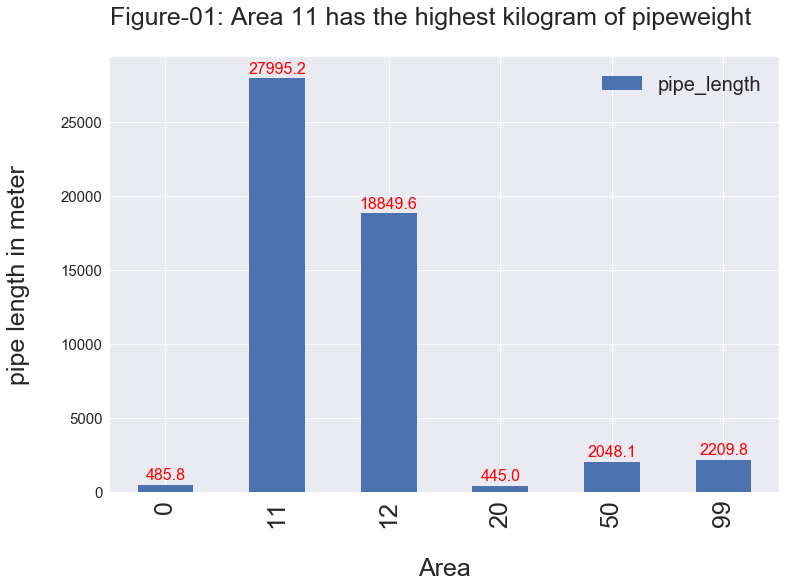

In [82]:
base_color = sns.color_palette()[0]
y_data = pd.Series(pipe_length_per_area ['pipe_length'])
x_labels = pipe_length_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-01: Area 11 has the highest kilogram of pipeweight\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('pipe length in meter\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
plt.legend(loc='upper right', fontsize=20)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=16, color= 'red')                      
            

In [16]:
#pipe length per material type in each area
pipe_size_per_material = df_pipe.groupby(['AREA', 'MATL_CODE_PRNT']).QTY_REQUIRED.sum().reset_index(name = 'length')
pipe_size_per_material = pipe_size_per_material.pivot(index = 'AREA' , columns = 'MATL_CODE_PRNT', values = 'length')
pipe_size_per_material

MATL_CODE_PRNT,Carbon Steels,Low and Intermediate Alloy Steels,Stainless Steels
AREA,,,
0,154.30,NaN,331.52
11,11706.23,514.83,15774.11
12,5651.26,NaN,13198.38
20,430.10,NaN,14.87
50,1464.92,NaN,583.17
99,783.78,128.38,1297.62


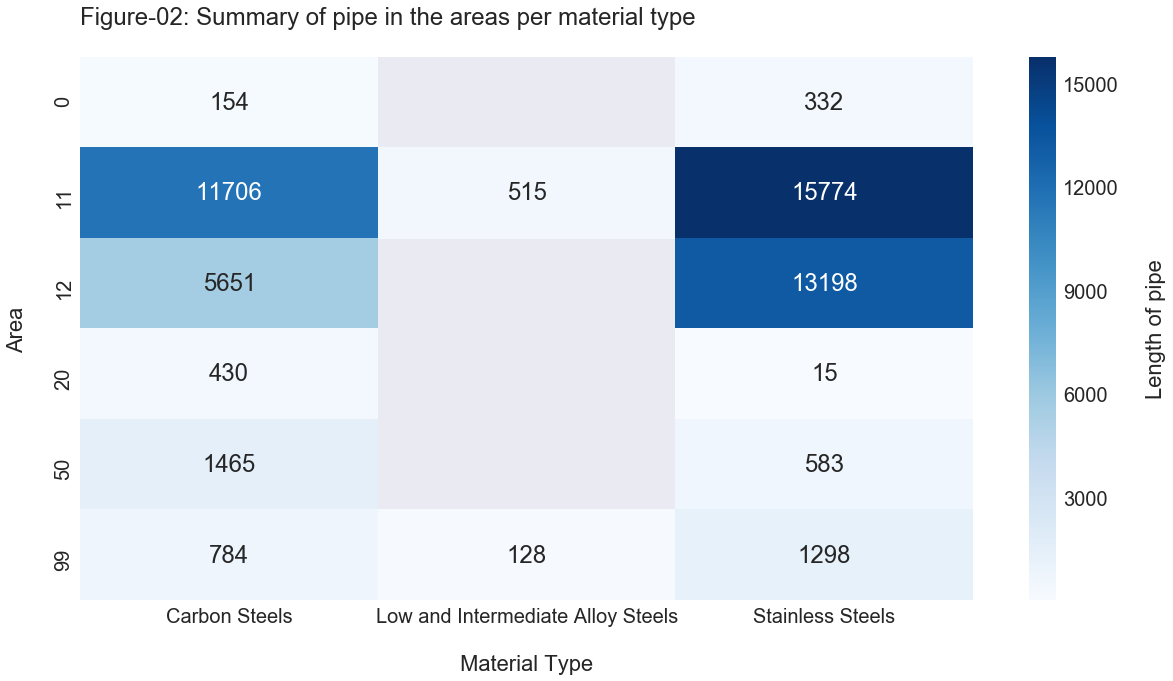

In [17]:
#summary of the pipe length per material type in each area
plt.figure(figsize = [20, 10])
sns.set(font_scale = 2)
sns.heatmap(pipe_size_per_material,annot = True, fmt = '0.0f', cbar=True, cmap="Blues",cbar_kws={'label': '\nLength of pipe'})
plt.title('Figure-02: Summary of pipe in the areas per material type \n',loc="left")
plt.xlabel("\n Material Type ")
plt.ylabel("Area\n")
plt.show();

### 2. Line Size

In [18]:
#make a copy of the dataset 
df_line = df_fluor.copy()
df_line.head(2)

,BOM_NUMBER,WBS,AREA,FAB_CLASS,SIZE_1,SIZE_2,SIZE_3,UOM_SIZE_1,UOM_SIZE_2,UOM_SIZE_3,WEIGHT,WEIGHT_UOM,MATL_CODE_PRNT,EST_CATEGORY,QTY_REQUIRED
0,MMX-2311010-01,110002X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
1,MMR-2311013-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0


In [19]:
# selct BOM_NUMBER and splitting it- taking the last three digit out to find the line number
df_line['line']= df_line['BOM_NUMBER'].astype(str).str[:-3]

In [20]:
# line number column delaration
df_line['line'] = df_line.drop_duplicates('line')

In [21]:
# first three rows of the df
df_fluor.head(3)

,BOM_NUMBER,WBS,AREA,FAB_CLASS,SIZE_1,SIZE_2,SIZE_3,UOM_SIZE_1,UOM_SIZE_2,UOM_SIZE_3,WEIGHT,WEIGHT_UOM,MATL_CODE_PRNT,EST_CATEGORY,QTY_REQUIRED
0,MMX-2311010-01,110002X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
1,MMR-2311013-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
2,MMX-2311036-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0


In [22]:
# drop duplicate values of line number
df_line.line.drop_duplicates(inplace=True)

In [23]:
# Check duplicate values of line number- should return False since there is none
df_line.line.duplicated().any()

False

## 2-A Small and Large Bore Lines

In [24]:
def finding_bore_size (x):
    """ Input: Integar or float. This function takes the size as input
        Output:  Return the bore size as output string based on the size"""
    
    if x <2: # if less than two inch return small bore
        return 'SB'
    
    elif x>= 2 and x<=48: # if greater than or equal to two but less than forty eight return large bore
        return 'LB'
    else: #if first two conditions does not meet return extra karfe extra large bore
        return 'XLB'

In [25]:
#applying the function
df_line['bore_size_1'] = df_fluor['SIZE_1'].apply(finding_bore_size)

In [26]:
df_line.head(3)

,BOM_NUMBER,WBS,AREA,FAB_CLASS,SIZE_1,SIZE_2,SIZE_3,UOM_SIZE_1,UOM_SIZE_2,UOM_SIZE_3,WEIGHT,WEIGHT_UOM,MATL_CODE_PRNT,EST_CATEGORY,QTY_REQUIRED,line,bore_size_1
0,MMX-2311010-01,110002X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0,MMX-2311010-01,LB
1,MMR-2311013-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0,MMR-2311013-01,LB
2,MMX-2311036-01,110001X,11,F,2.0,0.0,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0,MMX-2311036-01,LB


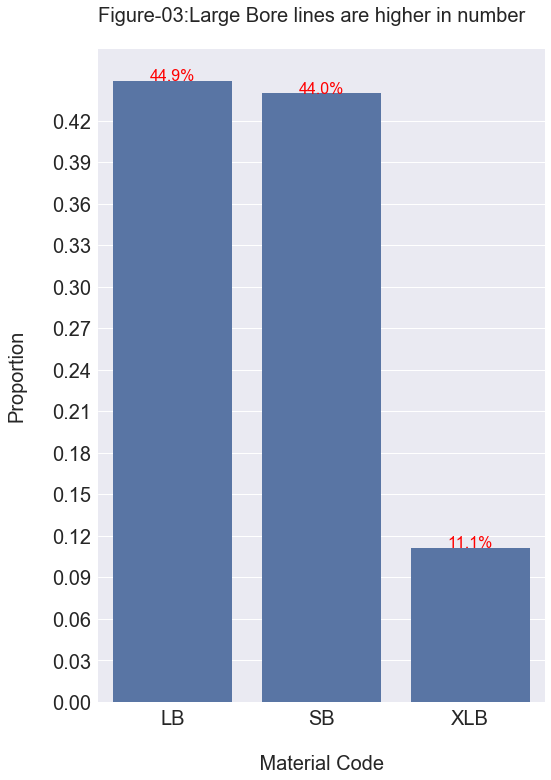

In [27]:
## Plotting the Proportion of bore line sizes  per area
plt.figure(figsize = [8, 12])
base_color = sns.color_palette()[1]
n_points = df_line['bore_size_1'].value_counts().sum()
max_count = df_line['bore_size_1'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_line, x = df_line['bore_size_1'], color = base_color, order = df_line['bore_size_1'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("\n Material Code ",fontsize=20)
plt.ylabel("Proportion\n",fontsize=20)
plt.title('Figure-03:Large Bore lines are higher in number \n',fontsize=20, loc="left")
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)


# add annotations
cat_counts = df_line['bore_size_1'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)
    sns.despine(bottom=True, left=True)

In [28]:
#find unique areas
df_line.AREA.unique()

array([11, 12, 50,  0, 99, 23, 20], dtype=int64)

In [29]:
bore_size_per_area = df_line.groupby(['AREA', 'bore_size_1']).size().reset_index(name = 'count')
bore_size_per_area = bore_size_per_area.pivot(index = 'bore_size_1' , columns = 'AREA', values = 'count')
bore_size_per_area 

AREA,0,11,12,20,23,50,99
bore_size_1,,,,,,,
LB,122.0,15882.0,14706.0,137.0,NaN,578.0,124.0
SB,5684.0,15869.0,8317.0,115.0,247.0,290.0,375.0
XLB,21.0,4251.0,3385.0,25.0,1.0,92.0,57.0


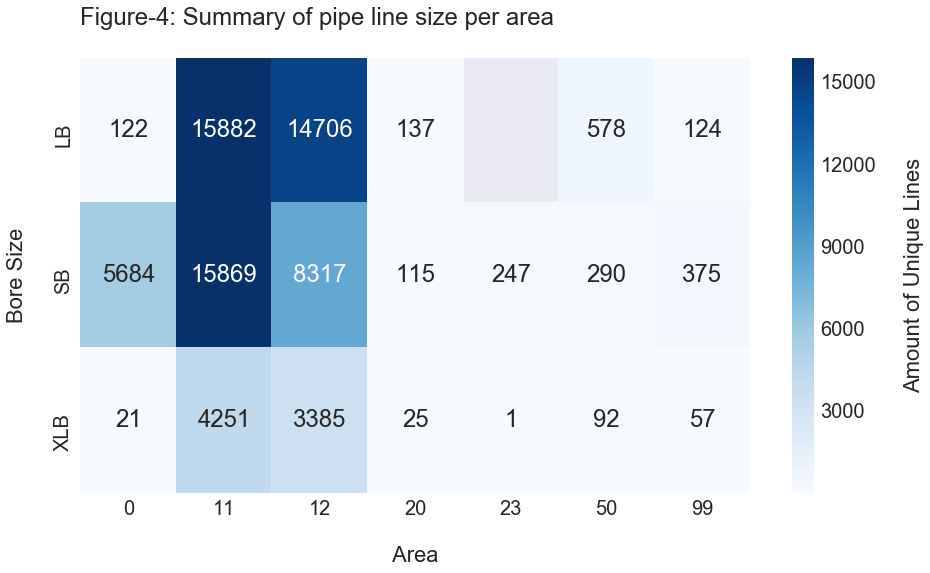

In [30]:
#summary of the amount of unique lines in each area
plt.figure(figsize = [15, 8])
sns.set(font_scale = 2)
bore_size_per_area = df_line.groupby(['AREA', 'bore_size_1']).size().reset_index(name = 'count')
bore_size_per_area = bore_size_per_area.pivot(index = 'bore_size_1' , columns = 'AREA', values = 'count')
sns.heatmap(bore_size_per_area,annot = True, fmt = '0.0f', cbar=True, cmap="Blues",cbar_kws={'label': '\nAmount of Unique Lines'})
plt.title('Figure-4: Summary of pipe line size per area \n',loc="left")
plt.xlabel("\n Area ")
plt.ylabel("Bore Size\n")
plt.show();

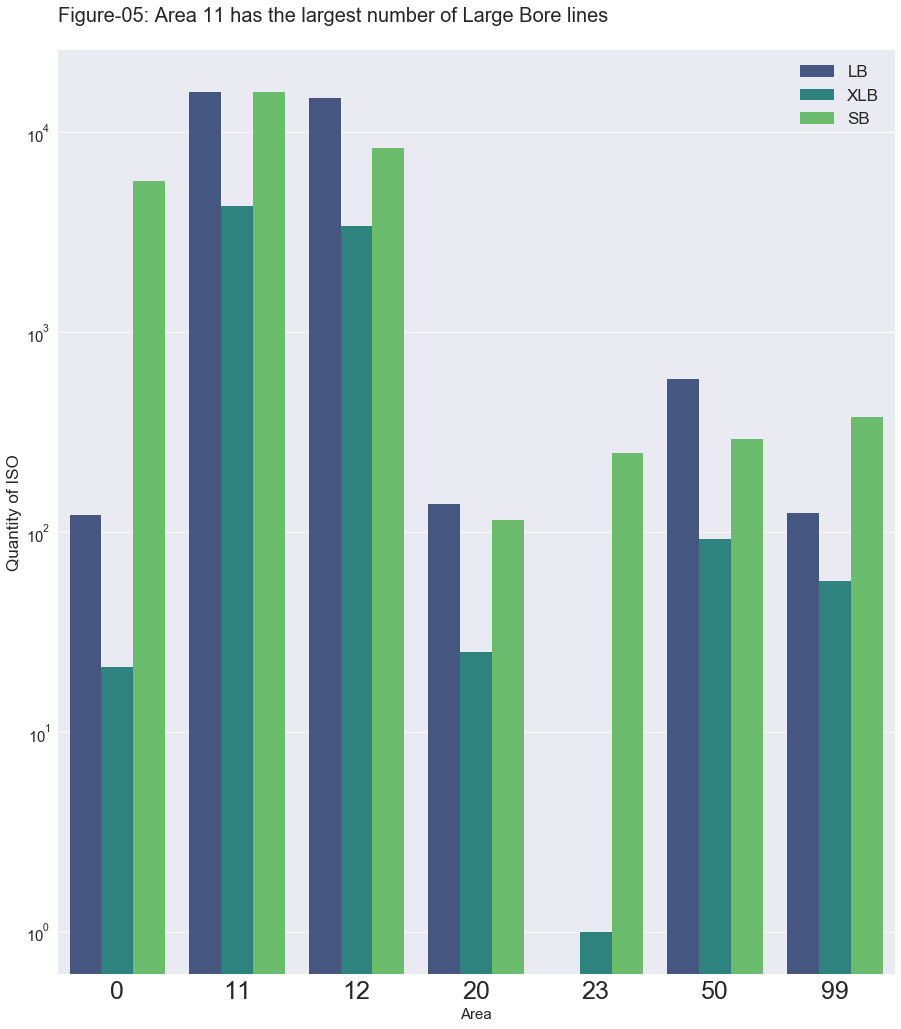

In [87]:
#plt bore type in each area
plt.figure(figsize = [15, 17])
sns.countplot(data = df_line, x = 'AREA', hue = 'bore_size_1', palette = 'viridis')
plt.xlabel("Area",fontsize=15)
plt.ylabel("Quantity of ISO",fontsize=17)
plt.title("Figure-05: Area 11 has the largest number of Large Bore lines\n",fontsize=20,loc="left")
plt.legend(loc=1,prop={'size':17})
sns.despine(bottom=True, left=True)
plt.yscale('log')
sns.despine(bottom=True, left=True)


**Source: https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

### 1.B- Pipe Weight Per area

In [32]:
#material weight per area for steels
pipe_weight = df_pipe.groupby(['AREA', 'MATL_CODE_PRNT']).WEIGHT.sum().reset_index()
pipe_weight= pipe_weight.pivot(index = 'MATL_CODE_PRNT' , columns =  'AREA'  , values = 'WEIGHT')
pipe_weight

AREA,0,11,12,20,50,99
MATL_CODE_PRNT,,,,,,
Carbon Steels,236.2532,17767.0609,5670.4053,199.2126,3826.0233,886.1629
Low and Intermediate Alloy Steels,NaN,1297.8015,NaN,NaN,NaN,290.9777
Stainless Steels,154.1997,12861.6880,16213.4076,18.1758,137.4339,209.7766


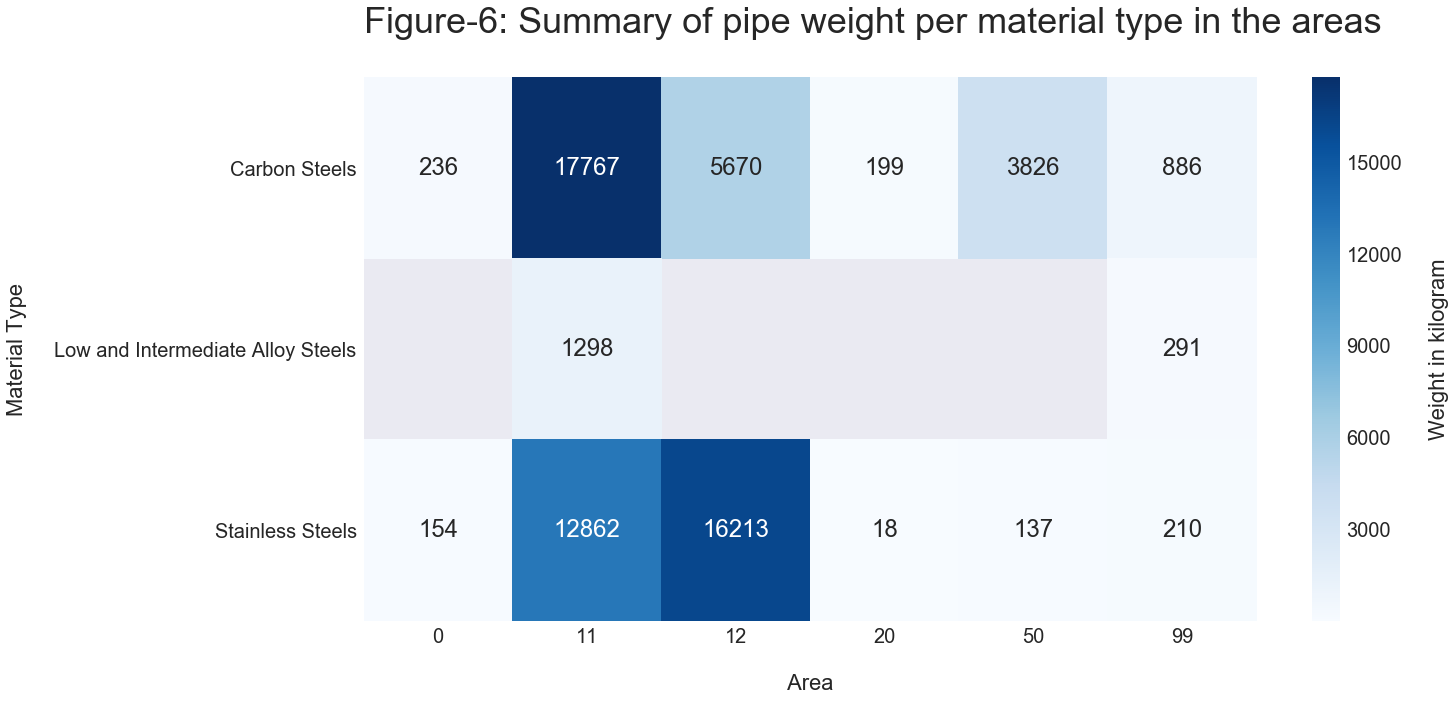

In [33]:
#summary of the material weight per area for steels
plt.figure(figsize = [20, 10])
sns.heatmap(pipe_weight,annot = True, fmt = '0.0f', cbar=True, cmap="Blues",cbar_kws={'label': '\nWeight in kilogram'})
sns.set(font_scale = 3)
plt.title('Figure-6: Summary of pipe weight per material type in the areas \n',loc="left")
plt.xlabel("\n Area ")
plt.ylabel("Material Type\n")
plt.show();

In [34]:
pipe_weight_per_area = df_pipe.groupby(['AREA']).WEIGHT.sum().reset_index(name='weight')
pipe_weight_per_area['weight'] = round (pipe_weight_per_area['weight'], 2)
pipe_weight_per_area

,AREA,weight
0,0,390.45
1,11,31926.55
2,12,21883.81
3,20,217.39
4,50,3963.46
5,99,1386.92


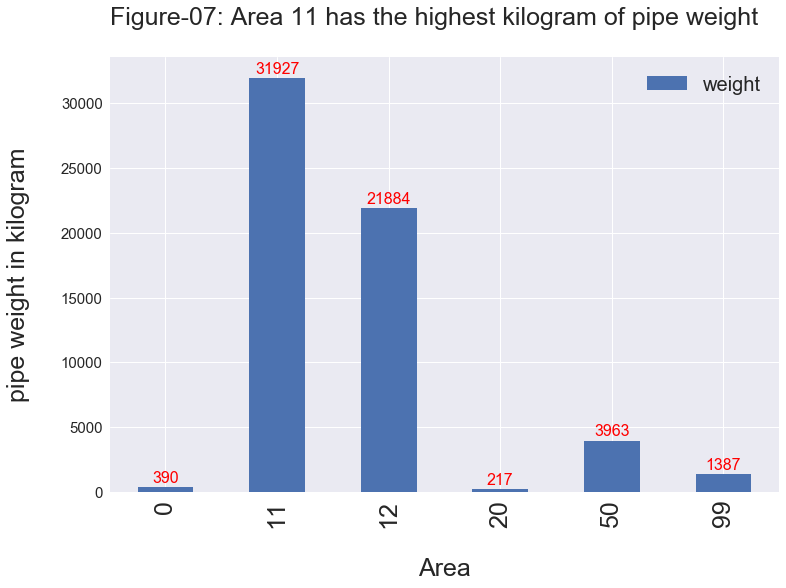

In [81]:
y_data = pd.Series(pipe_weight_per_area ['weight'])
x_labels = pipe_length_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-07: Area 11 has the highest kilogram of pipe weight\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('pipe weight in kilogram\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
plt.legend(loc='upper right', fontsize=20)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.0f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va,
                 fontsize=16, color= 'red')                      
                                    
plt.savefig("image.png")

## 2.Valve Quantity & Weight per area

In [36]:
df_fluor.head()

,BOM_NUMBER,WBS,AREA,FAB_CLASS,SIZE_1,SIZE_2,SIZE_3,UOM_SIZE_1,UOM_SIZE_2,UOM_SIZE_3,WEIGHT,WEIGHT_UOM,MATL_CODE_PRNT,EST_CATEGORY,QTY_REQUIRED
0,MMX-2311010-01,110002X,11,F,2.0,0.00,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
1,MMR-2311013-01,110001X,11,F,2.0,0.00,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
2,MMX-2311036-01,110001X,11,F,2.0,0.00,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
3,MMX-2311038-01,110001X,11,F,2.0,0.00,0,IN,IN,IN,0.0,KG,Stainless Steels,Pipe,0.0
4,BRR-2311040-04,110002X,11,F,85.0,0.75,0,IN,IN,IN,0.0,KG,Bolting materials,NaN,16.0


In [37]:
df_fluor['EST_CATEGORY'].unique()

array(['Pipe', nan, 'Nipple', 'Flange, Weld Neck', 'Coupler',
       'Gate Valve', 'Spacers', 'Stub end', 'Flange, Blind', 'Olet',
       'Strainers', 'Concentric Reducer', 'Eccentric Reducer',
       'Straight Tee', 'Elbow 45', 'Cap', 'Flange, Lap Joint',
       'Specialty Items', 'Check Valve', 'Elbow 90', 'Ball Valve',
       'Reducer Tee', 'Butterfly Valve', 'Plug', 'Flange', 'Globe Valve',
       'Needle Valve', 'Tubing'], dtype=object)

In [38]:
df_Ball_valve = df_fluor.query('EST_CATEGORY == "Ball Valve"')
df_Globe_valve = df_fluor.query('EST_CATEGORY == "Globe Valve"')
df_Butterfly_valve = df_fluor.query('EST_CATEGORY == "Butterfly Valve"')
df_Check_valve = df_fluor.query('EST_CATEGORY == "Check Valve"')
df_Needle_valve = df_fluor.query('EST_CATEGORY == "Needle Valve"')
df_Gate_valve = df_fluor.query('EST_CATEGORY == "Gate Valve"')

In [39]:
df_Ball_valve_per_area = df_Ball_valve.groupby(['AREA'])['QTY_REQUIRED'].count().reset_index(name = 'Ball_valve_quantity')
df_Globe_valve_per_area = df_Globe_valve.groupby(['AREA'])['QTY_REQUIRED'].count().reset_index(name = 'Globe_valve_quantity')
df_Butterfly_valve_per_area = df_Butterfly_valve.groupby(['AREA'])['QTY_REQUIRED'].count().reset_index(name = 'Butterfly_valve_quantity')
df_Check_valve_per_area = df_Check_valve.groupby(['AREA'])['QTY_REQUIRED'].count().reset_index(name = 'Check_valve_quantity')
df_Needle_valve_per_area = df_Needle_valve.groupby(['AREA'])['QTY_REQUIRED'].count().reset_index(name = 'Needle_valve_quantity')
df_Gate_valve_per_area = df_Gate_valve.groupby(['AREA'])['QTY_REQUIRED'].count().reset_index(name = 'Gate_valve_quantity')

In [40]:
df_Ball_valve_per_area

,AREA,Ball_valve_quantity
0,0,1
1,11,1418
2,12,796
3,20,4
4,23,3
5,50,12
6,99,8


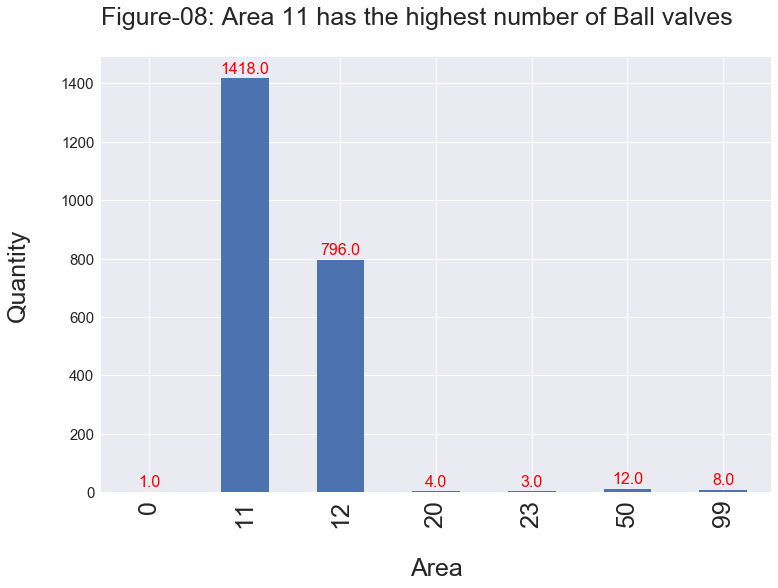

In [79]:
y_data = pd.Series(df_Ball_valve_per_area['Ball_valve_quantity'])
x_labels = df_Ball_valve_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-08: Area 11 has the highest number of Ball valves\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('Quantity\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va,fontsize=16, color= 'red')                      # Vertically align label differently for
                                    # positive and negative values.
plt.savefig("image.png")

In [42]:
df_ball_weight = df_Ball_valve.groupby(['AREA', 'MATL_CODE_PRNT']).WEIGHT.sum().reset_index(name = 'ball_valve_weight')
df_ball_weight

,AREA,MATL_CODE_PRNT,ball_valve_weight
0,0,Stainless Steels,3.41
1,11,Carbon Steels,293.18
2,11,Stainless Steels,7530.82
3,12,Carbon Steels,28.89
4,12,Stainless Steels,4148.08
5,20,Stainless Steels,40.92
6,23,Stainless Steels,4.98
7,50,Carbon Steels,4.18
8,50,Stainless Steels,74.84
9,99,Carbon Steels,14.60


In [43]:
df_Check_valve_per_area

,AREA,Check_valve_quantity
0,11,291
1,12,163
2,20,2
3,50,6
4,99,1


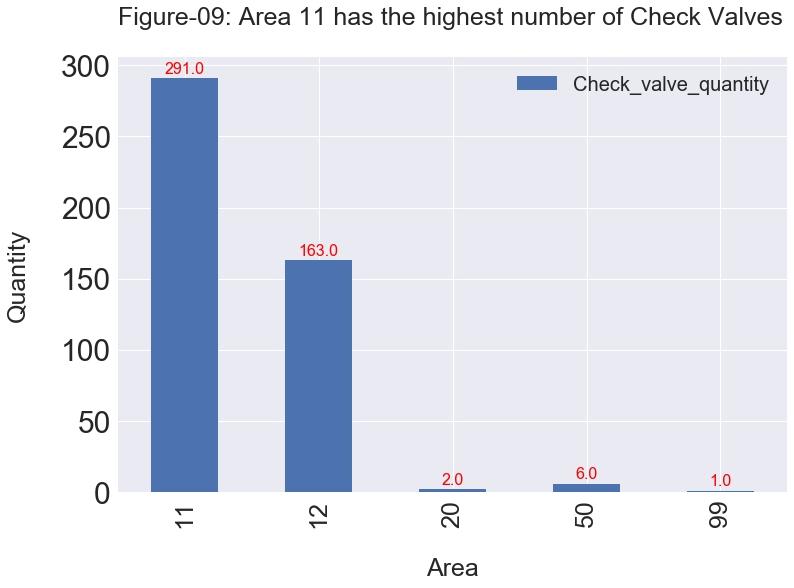

In [44]:
y_data = pd.Series(df_Check_valve_per_area['Check_valve_quantity'])
x_labels = df_Check_valve_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-09: Area 11 has the highest number of Check Valves\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('Quantity\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
plt.legend(loc='upper right', fontsize=20)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va,
                 fontsize=16, color= 'red')                      
                                    
plt.savefig("image.png")

In [45]:
df_Check_valve.groupby(['AREA', 'MATL_CODE_PRNT']).WEIGHT.sum().reset_index(name = 'check_valve_weight')

,AREA,MATL_CODE_PRNT,check_valve_weight
0,11,Carbon Steels,328.22
1,11,Stainless Steels,2085.63
2,12,Carbon Steels,302.07
3,12,Stainless Steels,830.98
4,20,Stainless Steels,57.14
5,50,Carbon Steels,30.02
6,50,Stainless Steels,45.75
7,99,Stainless Steels,15.25


In [46]:
df_Globe_valve_per_area

,AREA,Globe_valve_quantity
0,11,56
1,12,26
2,50,4


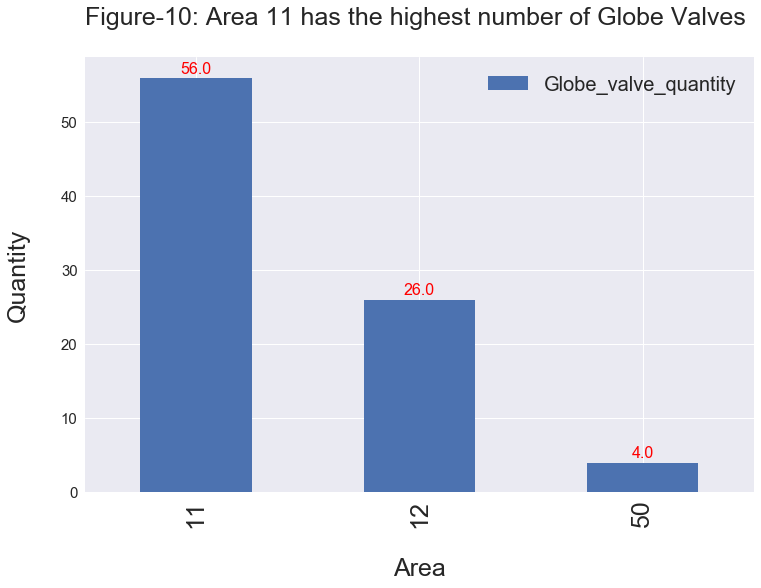

In [78]:
y_data = pd.Series(df_Globe_valve_per_area['Globe_valve_quantity'])
x_labels = df_Globe_valve_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-10: Area 11 has the highest number of Globe Valves\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('Quantity\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
plt.legend(loc='upper right', fontsize=20)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()/2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va,
                 fontsize=16, color= 'red')                      
                                    

In [48]:
df_globe_valve_weight=  df_Globe_valve.groupby(['AREA', 'MATL_CODE_PRNT']).WEIGHT.sum().reset_index(name = 'globe_valve_weight')
df_globe_valve_weight

,AREA,MATL_CODE_PRNT,globe_valve_weight
0,11,Carbon Steels,335.08
1,11,Low and Intermediate Alloy Steels,19.12
2,12,Carbon Steels,74.48
3,50,Carbon Steels,12.50


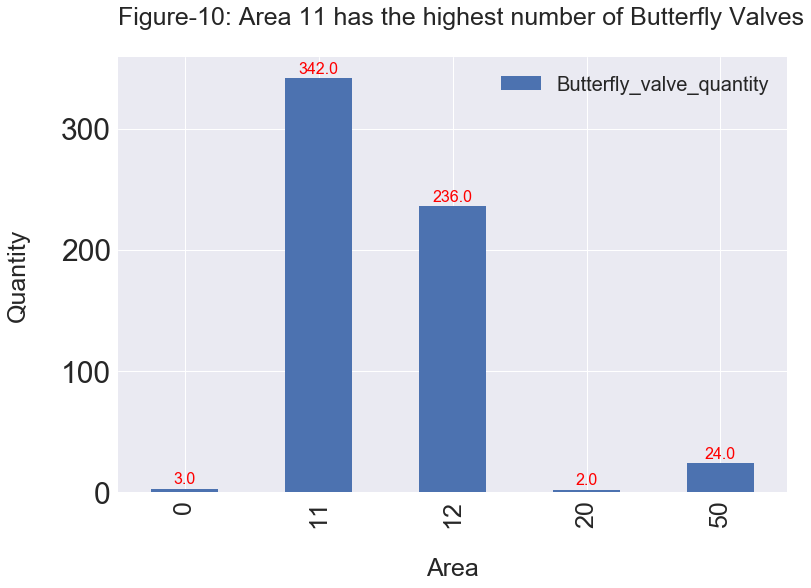

In [49]:
y_data = pd.Series(df_Butterfly_valve_per_area['Butterfly_valve_quantity'])
x_labels = df_Butterfly_valve_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-10: Area 11 has the highest number of Butterfly Valves\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('Quantity\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
plt.legend(loc='upper right', fontsize=20)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()/2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va,
                 fontsize=16, color= 'red')                      
                                    

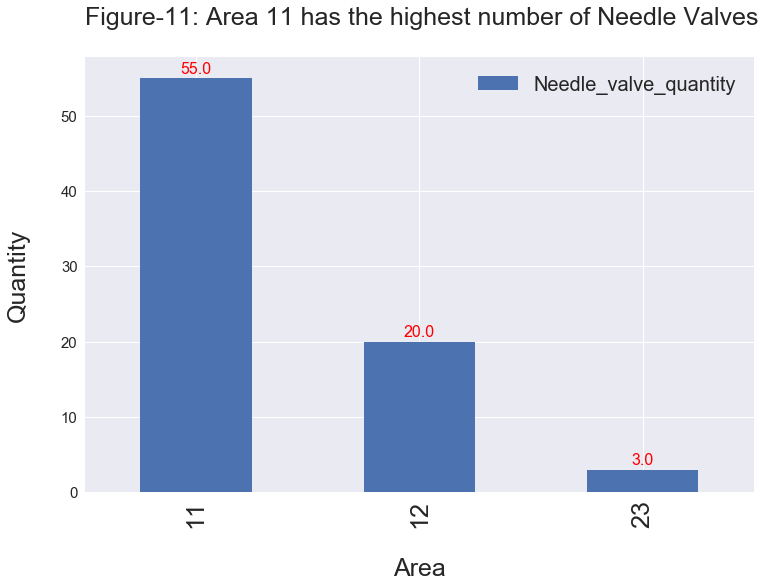

In [89]:
y_data = pd.Series(df_Needle_valve_per_area['Needle_valve_quantity'])
x_labels = df_Needle_valve_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-11: Area 11 has the highest number of Needle Valves\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('Quantity\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
plt.legend(loc='upper right', fontsize=20)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()/2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va,
                 fontsize=16, color= 'red')                      
                                    

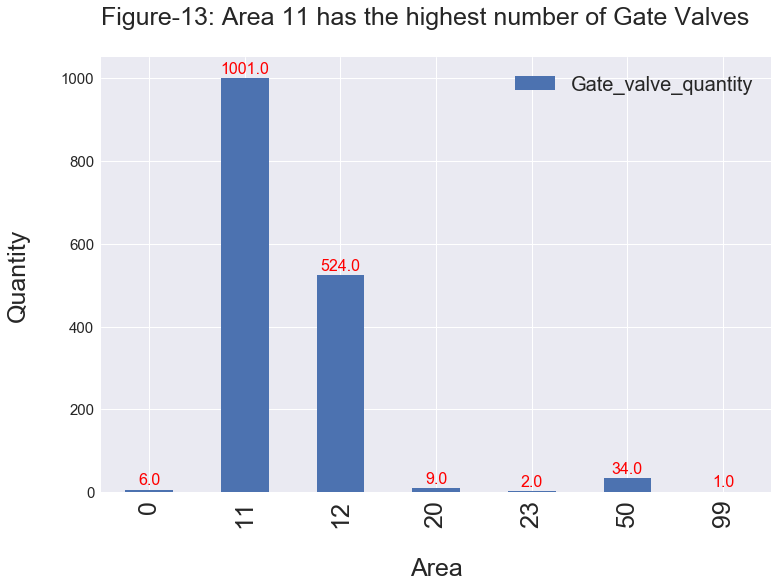

In [92]:
y_data = pd.Series(df_Gate_valve_per_area['Gate_valve_quantity'])
x_labels = df_Gate_valve_per_area['AREA']

# Plot the figure.
ax = y_data.plot(kind='bar',color = base_color, figsize = (12,8))
ax.set_title('Figure-13: Area 11 has the highest number of Gate Valves\n',fontsize=25, loc= 'left')
ax.set_xlabel('\nArea',fontsize=25)
ax.set_ylabel('Quantity\n',fontsize=25)
ax.set_xticklabels(x_labels,fontsize=25)
plt.legend(loc='upper right', fontsize=20)
sns.despine(bottom=True, left=True)
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width()/2
    space = 2 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}".format(y_value) # Use Y value as label and format number with tw0 decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va=va,
                 fontsize=16, color= 'red')                      
                                    

In [53]:
df_gate_valve_weight=  df_Gate_valve.groupby(['AREA', 'MATL_CODE_PRNT']).WEIGHT.sum().reset_index(name = 'gate_valve_weight')
df_gate_valve_weight

,AREA,MATL_CODE_PRNT,gate_valve_weight
0,0,Irons,0.00
1,0,Stainless Steels,0.00
2,11,Carbon Steels,19659.24
3,11,Low and Intermediate Alloy Steels,3513.51
4,11,Stainless Steels,1066.15
5,12,Carbon Steels,3425.19
6,12,Stainless Steels,163.40
7,20,Carbon Steels,154.89
8,23,Carbon Steels,5.98
9,50,Carbon Steels,447.43


## 3. specility items per area

In [54]:
df_sp_item = df_fluor.query('EST_CATEGORY=="Specialty Items"')
df_sp_item.head()

,BOM_NUMBER,WBS,AREA,FAB_CLASS,SIZE_1,SIZE_2,SIZE_3,UOM_SIZE_1,UOM_SIZE_2,UOM_SIZE_3,WEIGHT,WEIGHT_UOM,MATL_CODE_PRNT,EST_CATEGORY,QTY_REQUIRED
903,LSF-2317028-04,120003X,12,F,0.75,0.0,0,IN,IN,IN,0.0,KG,Carbon Steels,Specialty Items,1.0
904,LSF-2317045-02,120002X,12,F,0.75,0.0,0,IN,IN,IN,0.0,KG,Carbon Steels,Specialty Items,1.0
907,LSC-2325020-05,110001X,11,F,0.75,0.0,0,IN,IN,IN,0.0,KG,Carbon Steels,Specialty Items,1.0
910,LSF-2343051-03,500002X,50,F,0.75,0.0,0,IN,IN,IN,0.0,KG,Carbon Steels,Specialty Items,1.0
911,LSF-2364012-04,500003X,50,F,0.75,0.0,0,IN,IN,IN,0.0,KG,Carbon Steels,Specialty Items,1.0


In [55]:
df_sp_item_per_area = df_sp_item.groupby(['AREA'])['EST_CATEGORY'].count().reset_index(name = 'quantity')
df_sp_item_per_area 

,AREA,quantity
0,11,410
1,12,185
2,50,3
3,99,2


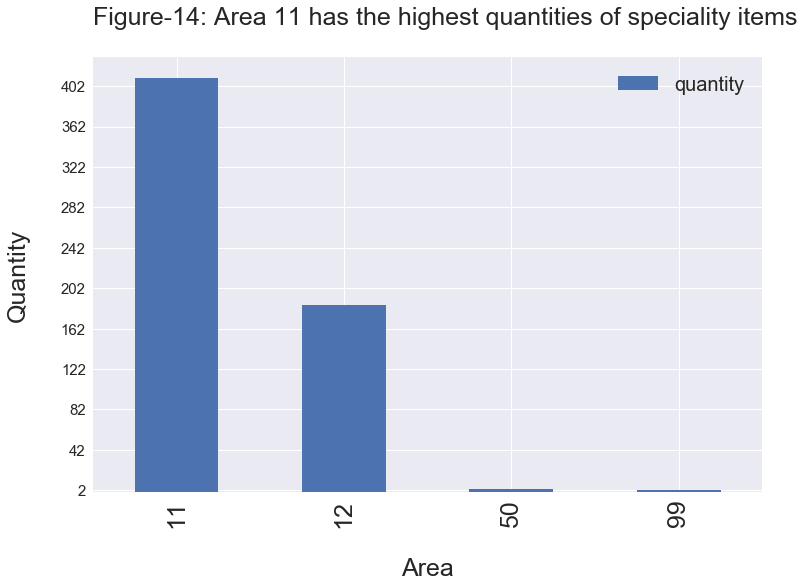

In [56]:
df_sp_item_per_area.plot.bar(x='AREA', y='quantity',color = base_color, figsize = (12,8))
plt.xlabel("\nArea", fontsize=25)
plt.ylabel("Quantity\n",fontsize=25)
plt.legend(loc='upper right', fontsize=20)
plt.title('Figure-14: Area 11 has the highest quantities of speciality items\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=15)
plt.yticks(np.arange(min(df_sp_item_per_area ['quantity']), max(df_sp_item_per_area ['quantity']), 40))
sns.despine(bottom=True, left=True)

In [57]:
df_sp_item_weight_area = df_sp_item.groupby(['AREA'])['WEIGHT'].sum().reset_index(name = 'quantity')
df_sp_item_per_area 

,AREA,quantity
0,11,410
1,12,185
2,50,3
3,99,2


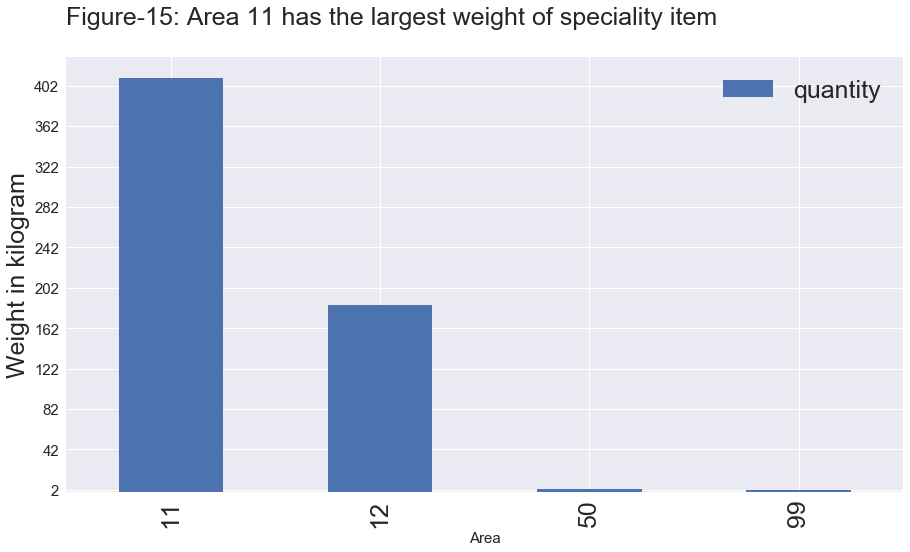

In [58]:
#plt.figure(figsize = [15, 8])
sp_item_weight = df_sp_item.groupby(['AREA', 'MATL_CODE_PRNT']).WEIGHT.sum().reset_index()
df_sp_item_per_area.plot.bar(x='AREA', y='quantity',color = base_color, figsize = (15,8))
plt.xlabel("Area", fontsize=15)
plt.ylabel("Weight in kilogram",fontsize=25)
plt.legend(loc='upper right', fontsize=25)
plt.title('Figure-15: Area 11 has the largest weight of speciality item \n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=15)
plt.yticks(np.arange(min(df_sp_item_per_area ['quantity']), max(df_sp_item_per_area ['quantity']),40))
sns.despine(bottom=True, left=True)

## 4. Fabrication Class Item per area

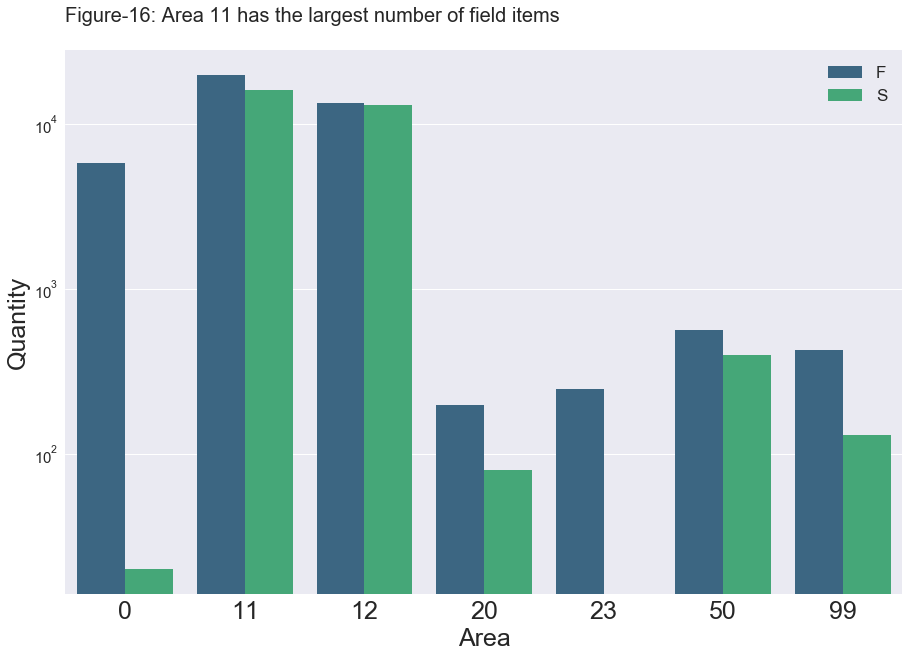

In [59]:
plt.figure(figsize = [15, 10])
sns.countplot(data = df_fluor, x = 'AREA', hue = 'FAB_CLASS', palette = 'viridis')
plt.xlabel("Area",fontsize=25)
plt.ylabel("Quantity",fontsize=25)
plt.title("Figure-16: Area 11 has the largest number of field items\n",fontsize=20,loc="left")
plt.legend(loc=1,prop={'size':17})
sns.despine(bottom=True, left=True)
plt.yscale('log')
sns.despine(bottom=True, left=True)

### 5. Material Type per Area

In [60]:
df_carbon_steels = df_fluor.query('MATL_CODE_PRNT == "Carbon Steels"')
df_carbon_steel = df_carbon_steels.groupby(['AREA']).WEIGHT.sum().reset_index()
df_carbon_steel

,AREA,WEIGHT
0,0,313.9232
1,11,59751.9209
2,12,30771.5753
3,20,510.3126
4,23,7.5600
5,50,7779.9333
6,99,947.4129


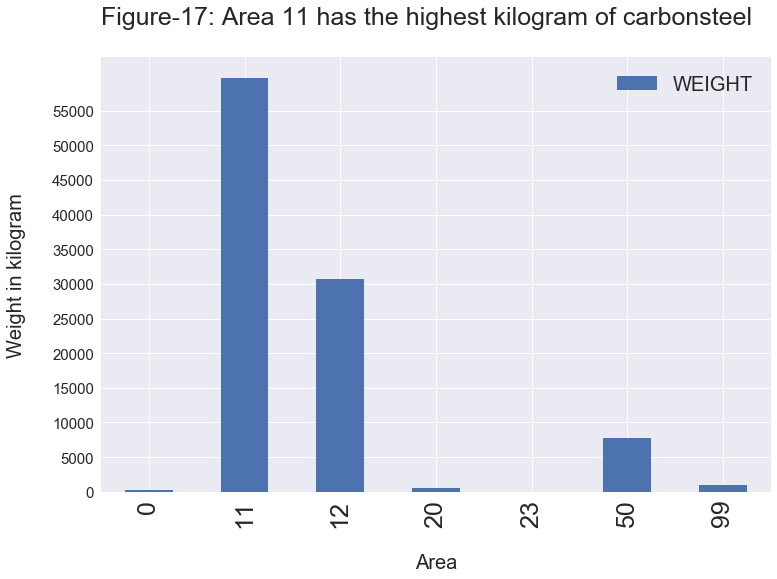

In [61]:
df_carbon_steel.plot.bar(x='AREA', y='WEIGHT',color = base_color, figsize = (12,8))
plt.xlabel("\nArea", fontsize=20)
plt.ylabel("Weight in kilogram\n",fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.title('Figure-17: Area 11 has the highest kilogram of carbonsteel\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=20)
plt.yticks(np.arange(0, max(df_carbon_steel['WEIGHT']), 5000.0))
sns.despine(bottom=True, left=True)

In [62]:
df_stainless_steels = df_fluor.query('MATL_CODE_PRNT == "Stainless Steels"')
df_stainless_steels = df_stainless_steels.groupby(['AREA']).WEIGHT.sum().reset_index()
df_stainless_steels

,AREA,WEIGHT
0,0,413.0497
1,11,36324.3980
2,12,31881.6276
3,20,133.2258
4,23,4.9800
5,50,306.9939
6,99,491.5566


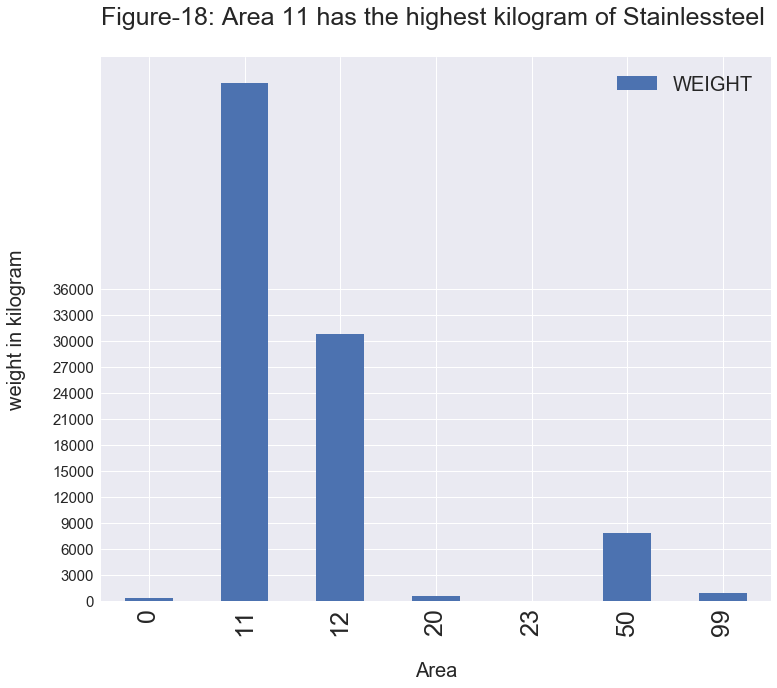

In [75]:
df_carbon_steel.plot.bar(x='AREA', y='WEIGHT',color = base_color, figsize = (12,10))
plt.xlabel("\nArea", fontsize=20)
plt.ylabel("weight in kilogram\n",fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.title('Figure-18: Area 11 has the highest kilogram of Stainlessteel\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=15)
plt.yticks(np.arange(0, max(df_stainless_steels['WEIGHT']),3000.0))
sns.despine(bottom=True, left=True)

In [64]:
df_alloy_steels = df_fluor.query('MATL_CODE_PRNT == "Low and Intermediate Alloy Steels"')
df_alloy_steels = df_alloy_steels.groupby(['AREA']).WEIGHT.sum().reset_index()
df_alloy_steels

,AREA,WEIGHT
0,11,5910.9915
1,99,296.6777


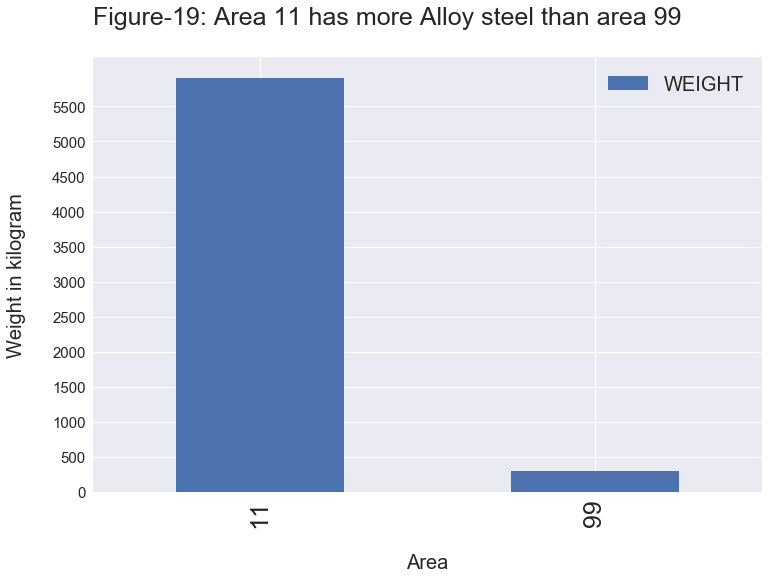

In [65]:
df_alloy_steels.plot.bar(x='AREA', y='WEIGHT',color = base_color, figsize = (12,8))
plt.xlabel("\nArea", fontsize=20)
plt.ylabel("Weight in kilogram\n",fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.title('Figure-19: Area 11 has more Alloy steel than area 99\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.yticks(np.arange(0, max(df_alloy_steels['WEIGHT']), 500.0))
sns.despine(bottom=True, left=True)

### 6. UEH_END items per Area

In [66]:
df_bolted = df_1.query('UEH_END =="BOLTED"')
df_screwed = df_1.query('UEH_END =="SCREWED"')
df_socket = df_1.query('UEH_END =="SOCKET WELD"')

In [67]:
bolted_quantity_per_area =  df_bolted.groupby(['AREA']).QTY_REQUIRED.sum().reset_index(name='bolted_quantity')
bolted_quantity_per_area 

,AREA,bolted_quantity
0,0,248.0
1,11,12119.0
2,12,6119.0
3,20,86.0
4,23,20.0
5,50,260.0
6,99,249.0


NameError: name 'bolted_quantty_per_area' is not defined

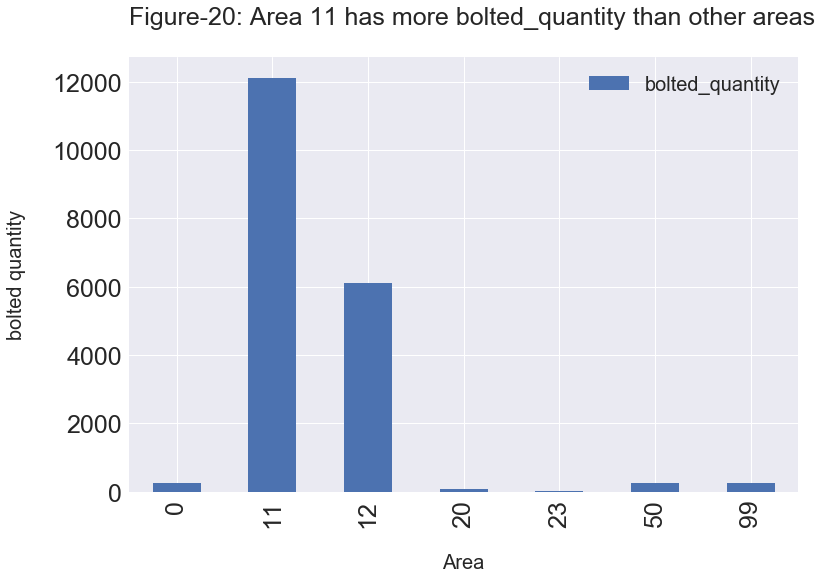

In [68]:
bolted_quantity_per_area.plot.bar(x='AREA', y='bolted_quantity',color = base_color, figsize = (12,8))
plt.xlabel("\nArea", fontsize=20)
plt.ylabel("bolted quantity\n",fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.title('Figure-20: Area 11 has more bolted_quantity than other areas\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.yticks(np.arange(min(bolted_quantty_per_area['bolted_quantity']), max(bolted_quantty_per_area['bolted_quantity']),3000.0))
sns.despine(bottom=True, left=True)

In [73]:
screwed_quantity_per_area =  df_screwed.groupby(['AREA']).QTY_REQUIRED.sum().reset_index(name='screwed_quantity')
screwed_quantity_per_area

,AREA,screwed_quantity
0,0,4.00
1,11,2352.00
2,12,1278.42
3,20,434.00
4,23,2.00
5,50,155.67
6,99,91.58


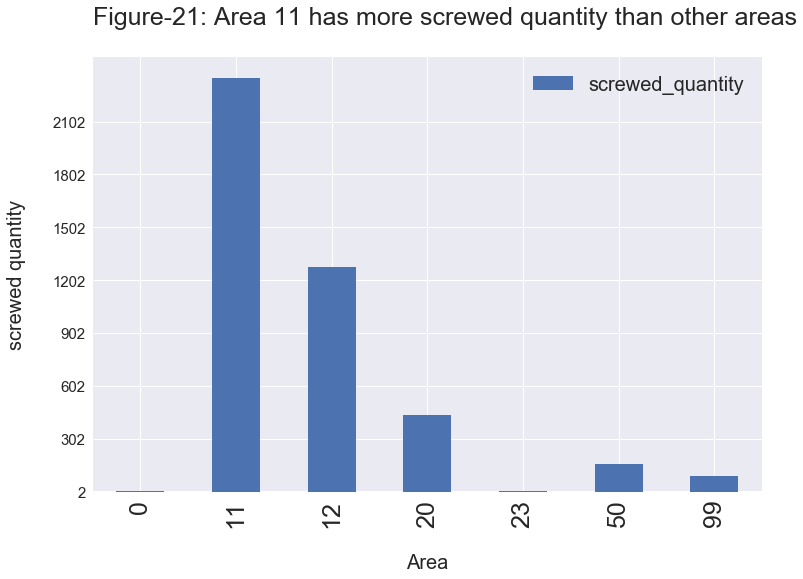

In [74]:
screwed_quantity_per_area.plot.bar(x='AREA', y='screwed_quantity',color = base_color, figsize = (12,8))
plt.xlabel("\nArea", fontsize=20)
plt.ylabel("screwed quantity\n",fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.title('Figure-21: Area 11 has more screwed quantity than other areas\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=15)
plt.yticks(np.arange(min(screwed_quantity_per_area ['screwed_quantity']), max(screwed_quantity_per_area ['screwed_quantity']),300.0))
sns.despine(bottom=True, left=True)

In [70]:
socket_weld_per_area =  df_socket.groupby(['AREA']).QTY_REQUIRED.sum().reset_index(name='socket_weld_quantity')
socket_weld_per_area

,AREA,socket_weld_quantity
0,11,2705.0
1,12,1448.0
2,20,2.0
3,50,63.0
4,99,235.0


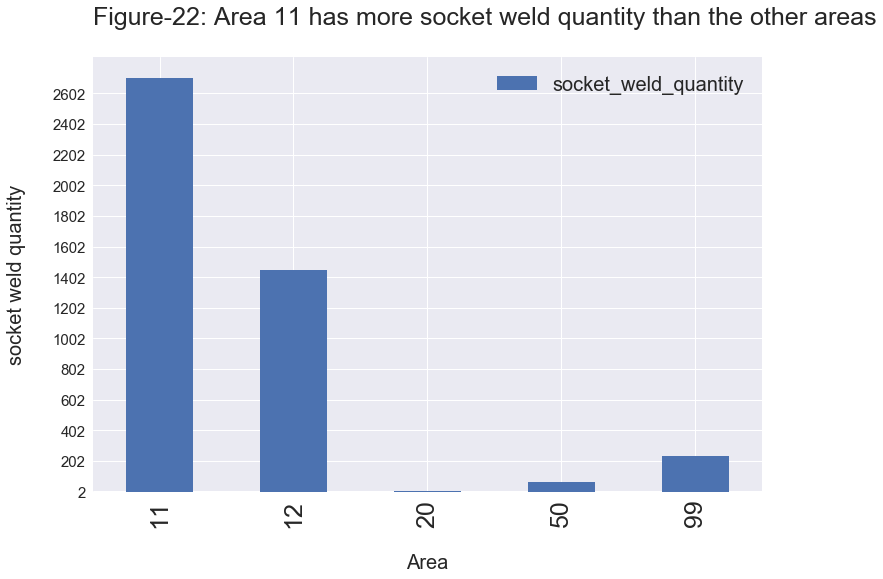

In [72]:
socket_weld_per_area.plot.bar(x='AREA', y='socket_weld_quantity',color = base_color, figsize = (12,8))
plt.xlabel("\nArea", fontsize=20)
plt.ylabel("socket weld quantity\n",fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.title('Figure-22: Area 11 has more socket weld quantity than the other areas\n',fontsize=25,loc="left")
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=15)
plt.yticks(np.arange(min(socket_weld_per_area ['socket_weld_quantity']), max(socket_weld_per_area ['socket_weld_quantity']),200.0))
sns.despine(bottom=True, left=True)